In [2]:
import sys
print("SYS",sys.version)
import numpy as np
import keras
import tensorflow as tf
print(tf.__version__)

# tf.set_random_seed(42)
import keras.backend as K
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM, Dropout
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Dense, Activation, Dropout, RepeatVector
# from tf.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle

SYS 3.10.2 (main, Mar 16 2022, 10:43:30) [GCC 4.8.5 20150623 (Red Hat 4.8.5-44)]
2.10.0


In [3]:
# This is the training data
#training_file = sys.argv[1]
training_file ="train.tsv"
# This is the filename that we will save the model in
#model_file = sys.argv[2]
model_file = "model3_seq15.dat"

corpus = ""
for line in open(training_file).readlines():

	# Each line in the training data is two columns
	# тыкгаткэта ивнин риӄукэтэ	ты>кгат>кэ>та ив>ни>н риӄукэ>тэ
	# print("line",line)
	row = line.strip().split('\t')
	# print("row", row)
	# The tokens are in the first column
	tokens = row[0]
	# print(tokens)
	# print("tokens", tokens)
	# Add the tokens to the list of sentences, with a beginning of sentence and an end of sentence marker
	# if len(corpus)==0:

	corpus+=tokens
	# else:
	# 	corpus.extend(tokens)

print(set(corpus))
chars = sorted(list(set(corpus)))
print(chars)
char_index = dict((c,i) for i,c in enumerate(chars))
index_char = dict((i,c) for i,c in enumerate(chars))
print(char_index)
print(index_char)

SEQUENCE_LENGTH = 15
step = 3
sentences = []
next_chars = []
for i in range(0, len(corpus) - SEQUENCE_LENGTH, step):
    sentences.append(corpus[i: i + SEQUENCE_LENGTH])
    next_chars.append(corpus[i + SEQUENCE_LENGTH])

print(sentences[2])
print(next_chars[2])
X=np.zeros((len(sentences),SEQUENCE_LENGTH,len(chars)), dtype = int)
Y=np.zeros((len(sentences),len(chars)), dtype = int)

for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_index[char]] = 1
    Y[i, char_index[next_chars[i]]] = 1

print(X)
print(Y)
print(len(X))
print(sentences[2])
print(next_chars[2])

{'т', 'у', 'ԓ', 'е', 'а', 'ь', 'и', 'к', ' ', 'ʼ', 'ы', 'ё', 'щ', 'о', 'ӄ', 'э', 'н', 'п', 'б', 'я', 'ф', 'ш', 'ж', 'с', 'ю', 'ц', 'й', 'ӈ', 'г', 'д', 'қ', 'з', 'в', 'ң', '’', 'р', 'ъ', 'м', 'х', 'ч'}
[' ', 'ʼ', 'а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я', 'ё', 'қ', 'ң', 'ӄ', 'ӈ', 'ԓ', '’']
{' ': 0, 'ʼ': 1, 'а': 2, 'б': 3, 'в': 4, 'г': 5, 'д': 6, 'е': 7, 'ж': 8, 'з': 9, 'и': 10, 'й': 11, 'к': 12, 'м': 13, 'н': 14, 'о': 15, 'п': 16, 'р': 17, 'с': 18, 'т': 19, 'у': 20, 'ф': 21, 'х': 22, 'ц': 23, 'ч': 24, 'ш': 25, 'щ': 26, 'ъ': 27, 'ы': 28, 'ь': 29, 'э': 30, 'ю': 31, 'я': 32, 'ё': 33, 'қ': 34, 'ң': 35, 'ӄ': 36, 'ӈ': 37, 'ԓ': 38, '’': 39}
{0: ' ', 1: 'ʼ', 2: 'а', 3: 'б', 4: 'в', 5: 'г', 6: 'д', 7: 'е', 8: 'ж', 9: 'з', 10: 'и', 11: 'й', 12: 'к', 13: 'м', 14: 'н', 15: 'о', 16: 'п', 17: 'р', 18: 'с', 19: 'т', 20: 'у', 21: 'ф', 22: 'х', 23: 'ц', 24: 'ч', 25: 'ш', 26: 'щ', 27: 'ъ', 28: 

In [17]:
model = Sequential()
model.add(LSTM(128, input_shape=(SEQUENCE_LENGTH, len(chars)), return_sequences=True))
model.add(LSTM(128))
model.add(Dense(len(chars)))
model.add(Activation('softmax'))

# optimizer = RMSprop(lr=0.01)

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.optimizer.lr=0.0001
history = model.fit(X, Y, validation_split=0.05, batch_size=128, epochs=100, shuffle=True).history

print("end")
print("Learning rate",K.eval(model.optimizer.lr))
mf = open(model_file, 'wb')
pickle.dump(model, mf)

Epoch 1/100
2767/2767 [==============================] - 111s 38ms/step - loss: 2.9451 - accuracy: 0.1558 - val_loss: 2.7211 - val_accuracy: 0.2343
Epoch 2/100
2767/2767 [==============================] - 101s 37ms/step - loss: 2.5872 - accuracy: 0.2336 - val_loss: 2.4733 - val_accuracy: 0.2488
Epoch 3/100
2767/2767 [==============================] - 102s 37ms/step - loss: 2.4476 - accuracy: 0.2536 - val_loss: 2.3797 - val_accuracy: 0.2663
Epoch 4/100
2767/2767 [==============================] - 102s 37ms/step - loss: 2.3789 - accuracy: 0.2657 - val_loss: 2.3252 - val_accuracy: 0.2799
Epoch 5/100
2767/2767 [==============================] - 102s 37ms/step - loss: 2.3293 - accuracy: 0.2782 - val_loss: 2.2709 - val_accuracy: 0.2942
Epoch 6/100
2767/2767 [==============================] - 102s 37ms/step - loss: 2.2846 - accuracy: 0.2908 - val_loss: 2.2226 - val_accuracy: 0.3040
Epoch 7/100
2767/2767 [==============================] - 102s 37ms/step - loss: 2.2434 - accuracy: 0.3036 - val_

2767/2767 [==============================] - 102s 37ms/step - loss: 1.5853 - accuracy: 0.5245 - val_loss: 1.6795 - val_accuracy: 0.5000
Epoch 57/100
2767/2767 [==============================] - 102s 37ms/step - loss: 1.5801 - accuracy: 0.5262 - val_loss: 1.6755 - val_accuracy: 0.5016
Epoch 58/100
2767/2767 [==============================] - 103s 37ms/step - loss: 1.5751 - accuracy: 0.5271 - val_loss: 1.6700 - val_accuracy: 0.5046
Epoch 59/100
2767/2767 [==============================] - 103s 37ms/step - loss: 1.5702 - accuracy: 0.5290 - val_loss: 1.6715 - val_accuracy: 0.5049
Epoch 60/100
2767/2767 [==============================] - 104s 37ms/step - loss: 1.5650 - accuracy: 0.5306 - val_loss: 1.6710 - val_accuracy: 0.5056
Epoch 61/100
2767/2767 [==============================] - 103s 37ms/step - loss: 1.5603 - accuracy: 0.5320 - val_loss: 1.6735 - val_accuracy: 0.5019
Epoch 62/100
2767/2767 [==============================] - 103s 37ms/step - loss: 1.5554 - accuracy: 0.5333 - val_loss: 

INFO:tensorflow:Assets written to: ram://b23b2b4f-a82f-48ae-9596-7c66de117589/assets


INFO:tensorflow:Assets written to: ram://b23b2b4f-a82f-48ae-9596-7c66de117589/assets


In [18]:
import matplotlib.pyplot as plt

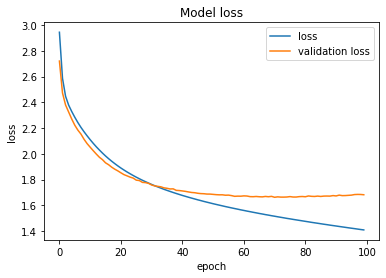

In [19]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss','validation loss'])
plt.savefig("100epochs_lr1e-1_seq15.png")

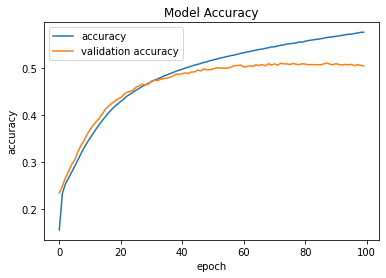

In [20]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['accuracy','validation accuracy'])
plt.savefig("100epochs_lr1e-1_accuracy_seq15.png")

In [21]:
def prepare_input(text):
    x = np.zeros((1, SEQUENCE_LENGTH, len(chars)))    
    for t, char in enumerate(text):
        x[0, t, char_index[char]] = 1.
        
    return x

In [22]:
import heapq
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    
    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [23]:
def predict_completion(text):
    original_text = text
    generated = text
    completion = ''
    while True:
        x = prepare_input(text)
        preds = model.predict(x, verbose=0)[0]
        next_index = sample(preds, top_n=1)[0]
        next_char = index_char[next_index]        
        text = text[1:] + next_char
        #print("next char:",next_char)
        completion += next_char
        
        if next_char==" " or len(completion)>SEQUENCE_LENGTH-5:
            return completion

In [24]:
def predict_completions(text, n=3):
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [index_char[idx] + predict_completion(text[1:] + index_char[idx]) for idx in next_indices]

In [25]:
validate=open('validation.tsv','r').readlines()[0:1000]
#print(validate)

In [26]:
validation_data=[]
for line in validate:
    lines=line.split('\t')
    text=lines[0]
    validation_data.append(text)

In [27]:
print(validation_data[:10])

['ганмыԓеным ытԓьэн аймак тэӈӄырым ныпэԓянэн', 'таӈӄонпы ынкы нытваԓьатӄэн ӄынвэр', 'ынанчинит', 'ыяагты ныԓӄытӄин тэӈэмръиԓемъетэ ынӄо', 'энмэч', 'эԓек гэԓгинъытвиԓин', 'энмэч этъым энъыӈ игык гэнъэтԓин ԓыгэным гаԓгэмчытвэԓен аны таӈӄонпы нытэнмавӄэн эгэты итык моогъэ рамчытвэӈкы еп ӄэюуӄэю вама ынӄо ԓьэԓеӈ', 'нэймэвӄин эвын ԓыгиӄитыргыԓьыӄэй ӄэюуӄэй эвыным ынкы ӄырымэн', 'ӄэюу энмэч ԓыгэн', 'пээчвако нынъэԓӄин амӄынъычо нырэрмэвӈыԓьэтӄин ӄԓегпээчваӄӄай гамгаӈайгыпы']


In [17]:
#output_file = open("output4_seq15.txt","a")
#for data in validation_data[:100]:
 #   output=predict_completions(data[:15])
  #  output_file.write(data+"   "+data[:15]+"   "+str(output)+"\n")
    

In [16]:
#print(predict_completions(text[:15]))

['ъэ ', 'ыргын ', 'ты ']


In [61]:
output_file2 = open("output_seq15_validation_100.txt","a")
input_line = ['ганмыԓеным ытԓьэн аймак тэӈӄырым ныпэԓянэн','рыԓейгут нинэнтыӄин ынраӄ эгычгын']
correct=0
total_output=[]
for line in validation_data[:100]:
    list1=line.split(" ")
    word_count = 0
    #correct=0
    
    output=[]
    trial=0
    for x in list1:
        text = ""
        for j in range(len(x)):
            if len(x)>=1:
                text+=x[j]
            #print("text",text)
                if len(text)>SEQUENCE_LENGTH:
                    text=text[-SEQUENCE_LENGTH:]
                #print("text",text)
                preds = predict_completions(text)
                #print("preds",preds)
                #print("comparison",x[j+1:])
                if x[j+1:] in preds:
                    correct+=1
                    output.append(preds)
                else:
                    if j<len(x)-1:
                        output+=[text+x[j+1]]
                    else:
                        output.append("_")
                        
            #text+=x[1:] + " "
        #output.append("_")
        #break
            
    #break
    total_output.append([line,output])
    output_file2.write(line+"   "+str(output)+"\n")
    
    #print(output)
    
        
#print(total_output)
print("Correct",correct)
    

[['ганмыԓеным ытԓьэн аймак тэӈӄырым ныпэԓянэн', ['га', 'ган', 'ганм', 'ганмы', 'ганмыԓ', 'ганмыԓе', 'ганмыԓен', 'ганмыԓены', 'ганмыԓеным', '_', 'ыт', 'ытԓ', 'ытԓь', 'ытԓьэ', 'ытԓьэн', '_', 'ай', 'айм', 'айма', 'аймак', '_', 'тэ', 'тэӈ', 'тэӈӄ', 'тэӈӄы', 'тэӈӄыр', 'тэӈӄыры', 'тэӈӄырым', '_', 'ны', 'нып', 'ныпэ', 'ныпэԓ', 'ныпэԓя', 'ныпэԓян', 'ныпэԓянэ', 'ныпэԓянэн', '_']], ['таӈӄонпы ынкы нытваԓьатӄэн ӄынвэр', ['та', 'таӈ', 'таӈӄ', 'таӈӄо', 'таӈӄон', 'таӈӄонп', 'таӈӄонпы', '_', 'ын', 'ынк', 'ынкы', '_', 'ны', 'ныт', 'нытв', 'нытва', 'нытваԓ', 'нытваԓь', 'нытваԓьа', 'нытваԓьат', 'нытваԓьатӄ', 'нытваԓьатӄэ', 'нытваԓьатӄэн', '_', 'ӄы', 'ӄын', 'ӄынв', 'ӄынвэ', 'ӄынвэр', '_']], ['ынанчинит', ['ын', 'ына', 'ынан', 'ынанч', 'ынанчи', 'ынанчин', 'ынанчини', 'ынанчинит', '_']], ['ыяагты ныԓӄытӄин тэӈэмръиԓемъетэ ынӄо', ['ыя', 'ыяа', 'ыяаг', 'ыяагт', 'ыяагты', '_', 'ны', 'ныԓ', 'ныԓӄ', 'ныԓӄы', 'ныԓӄыт', 'ныԓӄытӄ', 'ныԓӄытӄи', 'ныԓӄытӄин', '_', 'тэ', 'тэӈ', 'тэӈэ', 'тэӈэм', 'тэӈэмр', 'тэӈэмръ', '

In [51]:
print(output)

['г', 'га', 'ган', 'ганм', 'ганмы', 'ганмыԓ', 'ганмыԓе', 'ганмыԓен', 'ганмыԓены', 'ганмыԓеным', 'ы', 'ыт', 'ытԓ', 'ытԓь', 'ытԓьэ', 'ытԓьэн', 'а', 'ай', 'айм', 'айма', 'аймак', 'т', 'тэ', 'тэӈ', 'тэӈӄ', 'тэӈӄы', 'тэӈӄыр', 'тэӈӄыры', 'тэӈӄырым', 'н', 'ны', 'нып', 'ныпэ', 'ныпэԓ', 'ныпэԓя', 'ныпэԓян', 'ныпэԓянэ', 'ныпэԓянэн']
